# Bağımlılıkları İçe Aktarma

In [229]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Veri Toplama ve İşleme

In [230]:
# Veri kümesini pandasların DataFrame'ine yükleme
df = pd.read_csv('Student.csv')

In [231]:
type(df)

pandas.core.frame.DataFrame

In [232]:
# Veri çerçevesinin ilk 5 satırını yazdırma
df.head().style.background_gradient(axis=0)

,Unnamed: 0,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,0,group B,bachelor's degree,standard,none,0.720000,0.720000,0.740000,F
1,1,group C,some college,standard,completed,0.690000,0.900000,0.880000,F
2,2,group B,master's degree,standard,none,0.900000,0.950000,0.930000,F
3,3,group A,associate's degree,free/reduced,none,0.470000,0.570000,0.440000,M
4,4,group C,some college,standard,none,0.760000,0.780000,0.750000,M


In [233]:
# Satır ve Sütun sayısı
df.shape

(1000, 9)

In [234]:
df.columns

Index(['Unnamed: 0', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math percentage',
       'reading score percentage', 'writing score percentage', 'sex'],
      dtype='object')

In [235]:
# İstatistiksel ölçümler
df.describe()

,Unnamed: 0,math percentage,reading score percentage,writing score percentage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,0.660890,0.691690,0.680540
std,288.819436,0.151631,0.146002,0.151957
min,0.000000,0.000000,0.170000,0.100000
25%,249.750000,0.570000,0.590000,0.577500
50%,499.500000,0.660000,0.700000,0.690000
75%,749.250000,0.770000,0.790000,0.790000
max,999.000000,1.000000,1.000000,1.000000


In [236]:
# Her sütundaki eksik değer sayısı
df.isnull().sum()

Unnamed: 0                     0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math percentage                0
reading score percentage       0
writing score percentage       0
sex                            0
dtype: int64

# Veri Ön İşleme

In [237]:
new_df = pd.get_dummies(df, columns = ['parental level of education','race/ethnicity','lunch','test preparation course'] ,drop_first= True,prefix = 'Dumy',prefix_sep ="*" )
new_df.head().style.background_gradient(axis=0)

,Unnamed: 0,math percentage,reading score percentage,writing score percentage,sex,Dumy*bachelor's degree,Dumy*high school,Dumy*master's degree,Dumy*some college,Dumy*some high school,Dumy*group B,Dumy*group C,Dumy*group D,Dumy*group E,Dumy*standard,Dumy*none
0,0,0.720000,0.720000,0.740000,F,1,0,0,0,0,1,0,0,0,1,1
1,1,0.690000,0.900000,0.880000,F,0,0,0,1,0,0,1,0,0,1,0
2,2,0.900000,0.950000,0.930000,F,0,0,1,0,0,1,0,0,0,1,1
3,3,0.470000,0.570000,0.440000,M,0,0,0,0,0,0,0,0,0,0,1
4,4,0.760000,0.780000,0.750000,M,0,0,0,1,0,0,1,0,0,1,1


<AxesSubplot:xlabel='sex', ylabel='count'>

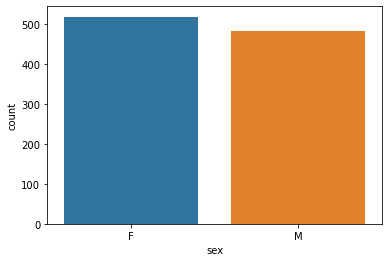

In [238]:
#Gördüğümüz gibi üzerinde çalışmak için herhangi bir dengesizlik verisi sorunu yok, bu yüzden şimdi biraz veri görselleştirme yapacağız:
sns.countplot(data = new_df , x = 'sex')

<AxesSubplot:>

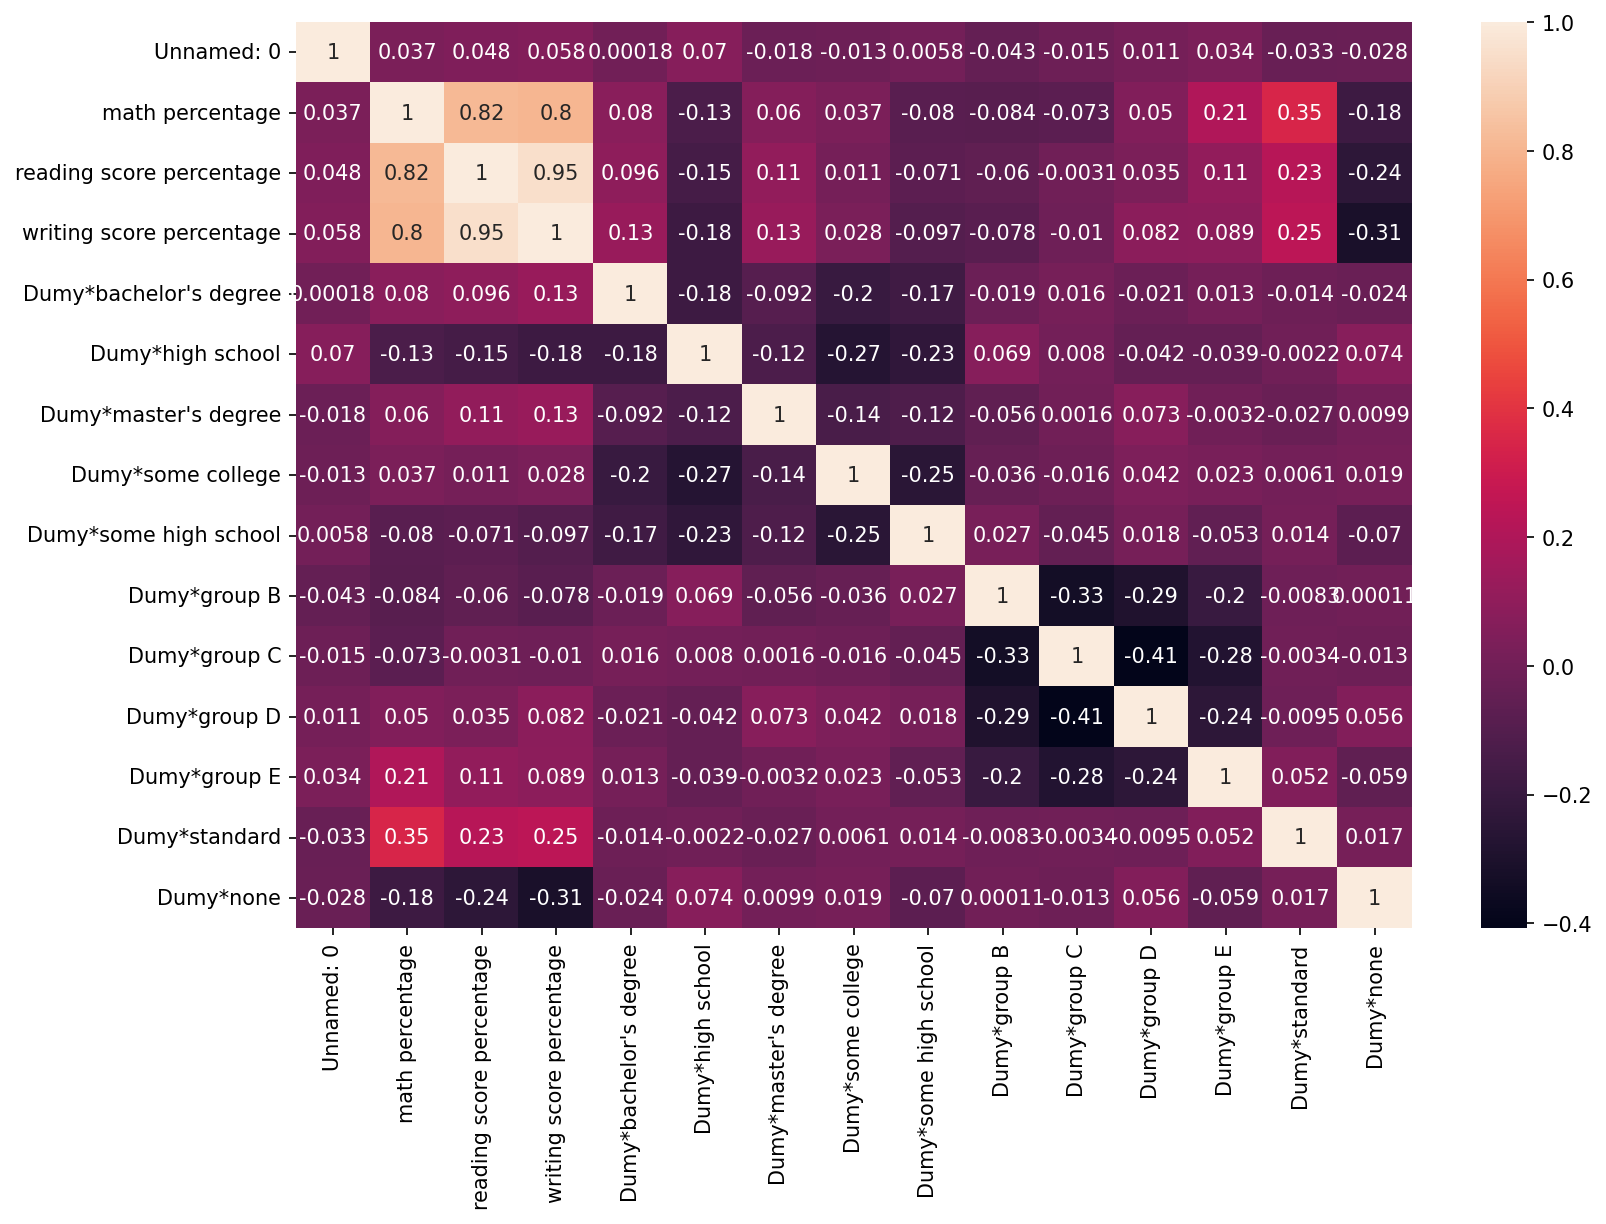

In [239]:
plt.figure(figsize=(12,8),dpi =150)
sns.heatmap(new_df.corr(),annot =True)

In [240]:
new_df.columns

Index(['Unnamed: 0', 'math percentage', 'reading score percentage',
       'writing score percentage', 'sex', 'Dumy*bachelor's degree',
       'Dumy*high school', 'Dumy*master's degree', 'Dumy*some college',
       'Dumy*some high school', 'Dumy*group B', 'Dumy*group C', 'Dumy*group D',
       'Dumy*group E', 'Dumy*standard', 'Dumy*none'],
      dtype='object')

<AxesSubplot:xlabel='math percentage', ylabel='reading score percentage'>

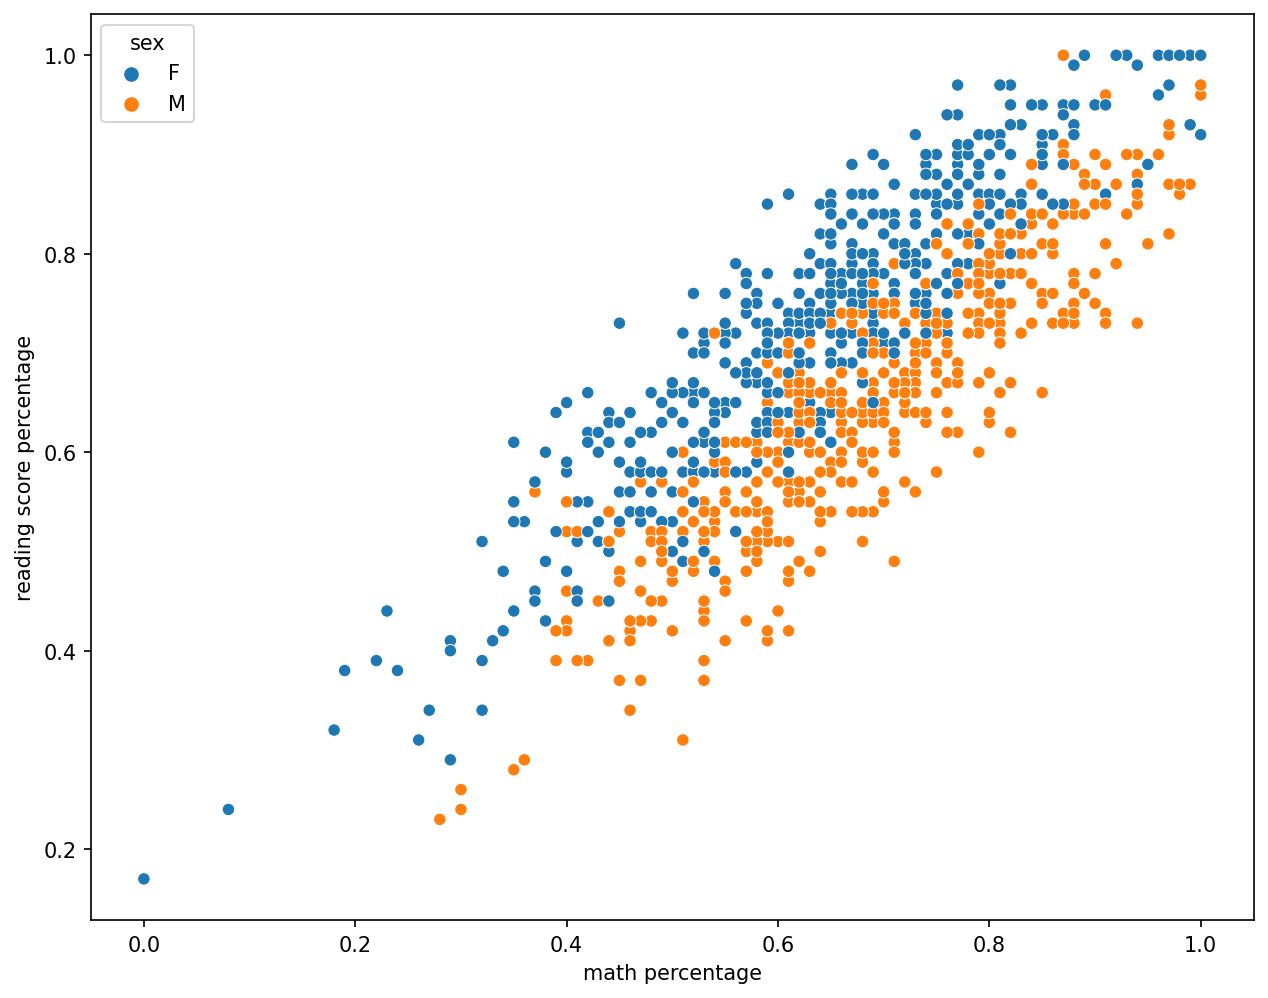

In [241]:
plt.figure(figsize=(10,8),dpi =150)
sns.scatterplot(data = new_df , x = 'math percentage',y= 'reading score percentage',hue = 'sex')

<AxesSubplot:xlabel='math percentage', ylabel='writing score percentage'>

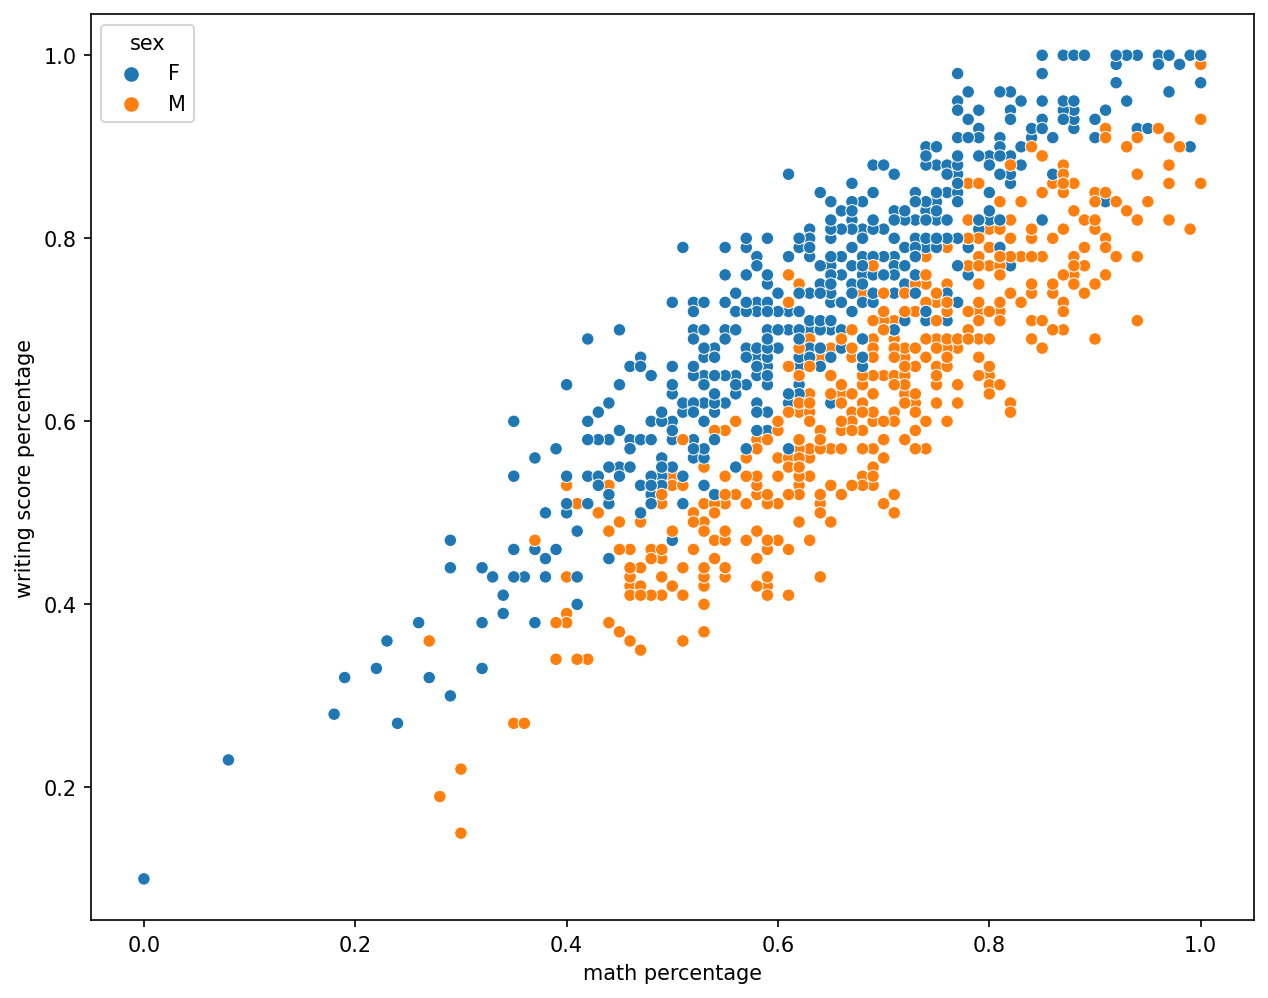

In [242]:
plt.figure(figsize=(10,8),dpi =150)
sns.scatterplot(data = new_df , x = 'math percentage',y= 'writing score percentage',hue = 'sex')

<AxesSubplot:xlabel='sex', ylabel='math percentage'>

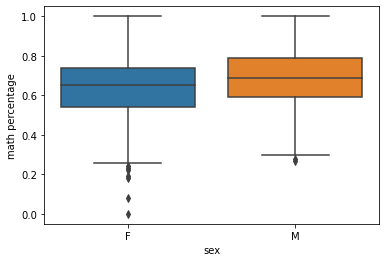

In [243]:
sns.boxplot(data = new_df , x ='sex',y='math percentage')

<AxesSubplot:xlabel='sex', ylabel='writing score percentage'>

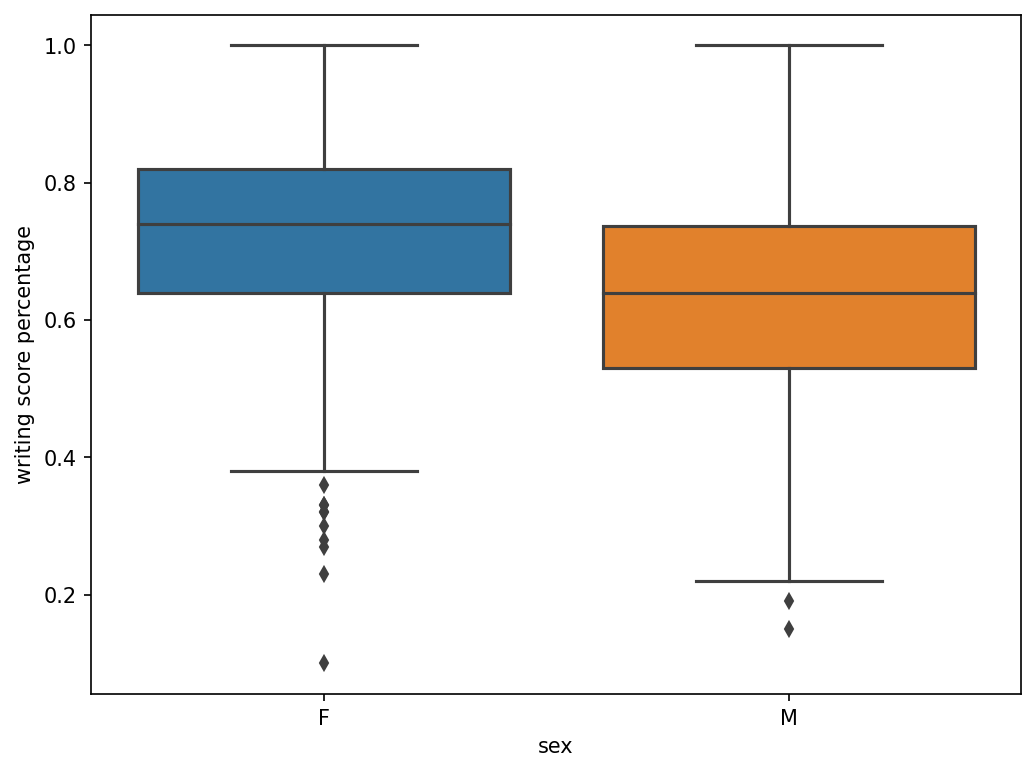

In [244]:
plt.figure(figsize = (8,6),dpi =150)
sns.boxplot(data = new_df , x ='sex',y='writing score percentage')

Verimizi ayırma işlemi

In [ ]:
# Now we are going to drop columns to get X and y :
X = new_df.drop('sex',axis=1)
y = new_df['sex']

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [248]:
scaler = StandardScaler()

In [249]:
scaler.fit(X_train)

StandardScaler()

In [250]:
scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [251]:
# şimdi tren testi bölüşümü yapacağız

# Şimdi 2 Algoritmayı (KNN & LogisticRegression) deneyeceğim ve en iyi doğruluk LogisticRegression olacaktır:

In [253]:
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_x_train,y_train)
    y_prediction = knn_model.predict(X_test)
    test_error = 1- accuracy_score(y_test , y_prediction)
    test_error_rates.append(test_error)

C:\Users\ramazan\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\ramazan\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\ramazan\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\ramazan\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\ramazan\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\ramazan\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but KNeighborsClassifier 

Text(0.5, 0, 'K Neigbors')

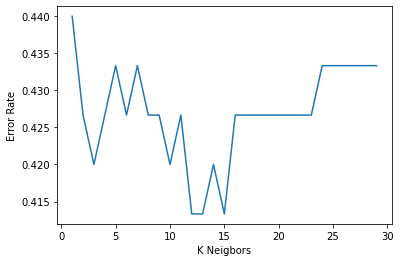

In [254]:
# So now we will choose 15 to be the k _ value :
plt.plot(range(1,30),test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neigbors')

In [272]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [273]:
y_predictions = model.predict(X_test)

In [274]:
knn_model_accuracy = accuracy_score(y_test,y_predictions)
knn_model_accuracy

0.5133333333333333

C:\Users\ramazan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


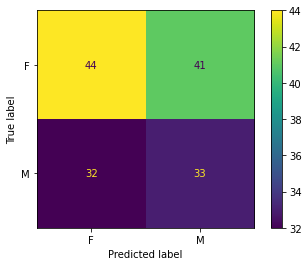

In [275]:
plot_confusion_matrix(model,X_test,y_test)

C:\Users\ramazan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


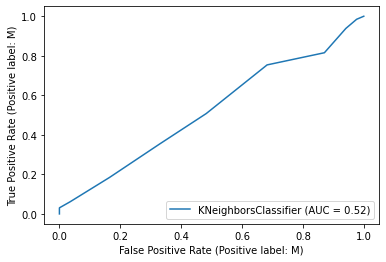

In [259]:
plot_roc_curve(model,X_test,y_test)

# GELİŞTİRME

# Lojistik Regresyon modeli

In [261]:
log_model = LogisticRegression()

In [277]:
log_model.fit(scaled_x_train,y_train)

LogisticRegression()

In [278]:
predections = log_model.predict(scaled_x_test)

In [279]:
logistic_regression_model_accuracy = accuracy_score(y_test,predections)
logistic_regression_model_accuracy

0.82

C:\Users\ramazan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


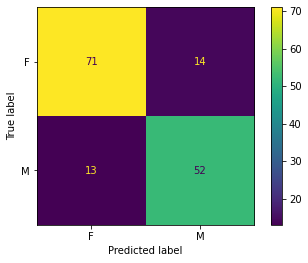

In [280]:
plot_confusion_matrix(log_model,scaled_x_test,y_test)

C:\Users\ramazan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


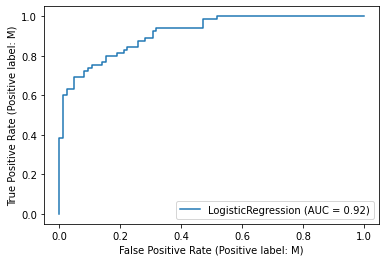

In [282]:
plot_roc_curve(log_model,scaled_x_test,y_test)

C:\Users\ramazan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


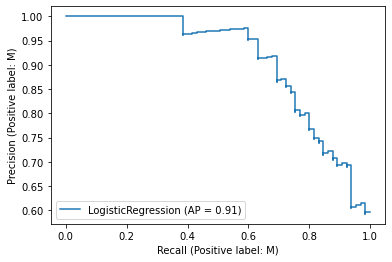

In [283]:
plot_precision_recall_curve(log_model,scaled_x_test,y_test)